In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pydicom

In [2]:
path0 = 'your data path'


### Single-Pixel Operation
- Image Negatives

TIFF (482, 571) L


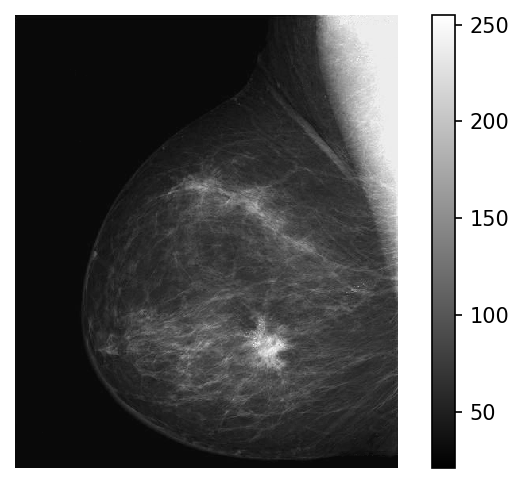

In [3]:
I = Image.open(path0+'breastXray.tif')
print(I.format, I.size, I.mode)
f = np.array(I)
plt.figure(dpi=150)
plt.imshow(f, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

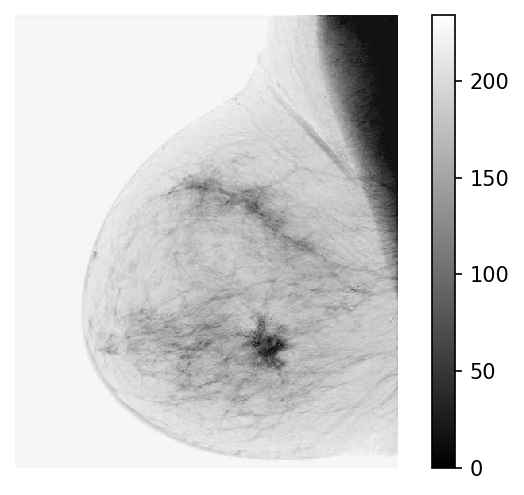

In [4]:
f_inv = np.max(f) - f
plt.figure(dpi=150)
plt.imshow(f_inv, cmap = 'gray')
plt.axis('off')
plt.colorbar()
plt.show()

- Log Transforms

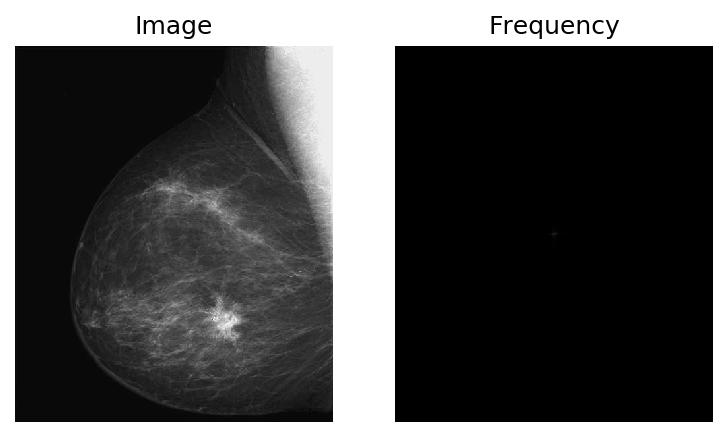

In [5]:
I = Image.open(path0+'breastXray.tif')
f = np.array(I)
F = np.fft.fftshift(np.fft.fft2(f))
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(f, cmap = 'gray')
plt.axis('off')
#plt.colorbar()
plt.title('Image')
plt.subplot(122)
plt.imshow(np.abs(F), cmap = 'gray')
plt.axis('off')
plt.title('Frequency')
#plt.colorbar()
plt.show()

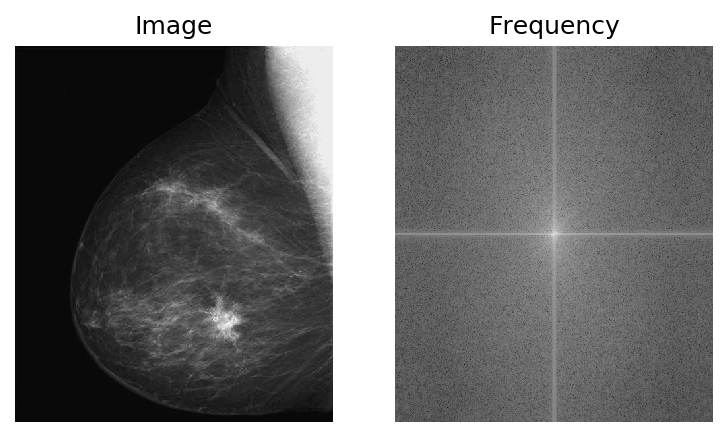

In [6]:
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(f, cmap = 'gray')
plt.axis('off')
#plt.colorbar()
plt.title('Image')
plt.subplot(122)
plt.imshow(np.log(np.abs(F)), cmap = 'gray')
plt.axis('off')
plt.title('Frequency')
#plt.colorbar()
plt.show()

- Fourier domain processing

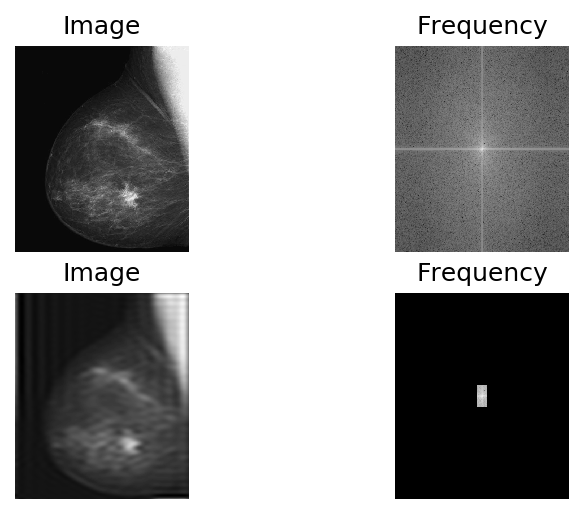

In [7]:
F_mask = np.zeros(F.shape)
F_mask[256:-256,228:-228] = 1
F_lpf = F_mask*F
f_lpf = np.fft.ifft2(np.fft.fftshift(F_lpf))


plt.figure(dpi=150)
plt.subplot(221)
plt.imshow(f, cmap = 'gray')
plt.axis('off')
#plt.colorbar()
plt.title('Image')
plt.subplot(222)
plt.imshow(np.log(np.abs(F)+.001), cmap = 'gray')
plt.axis('off')
plt.title('Frequency')
plt.subplot(223)
plt.imshow(np.abs(f_lpf), cmap = 'gray')
plt.axis('off')
#plt.colorbar()
plt.title('Image')
plt.subplot(224)
plt.imshow(np.log(np.abs(F_lpf)+.001), cmap = 'gray')
plt.axis('off')
plt.title('Frequency')
#plt.colorbar()
plt.show()

In [8]:
I = Image.open(path0+'spine.tif')
print(I.format, I.size, I.mode)
f = np.array(I)

TIFF (373, 488) L


- gamma correction

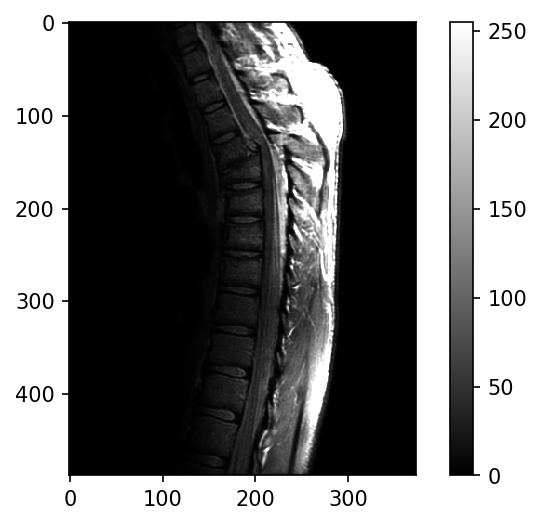

In [9]:
plt.figure(dpi=150)
plt.imshow(f, cmap = 'gray')
#plt.axis('off')
plt.colorbar()
plt.show()

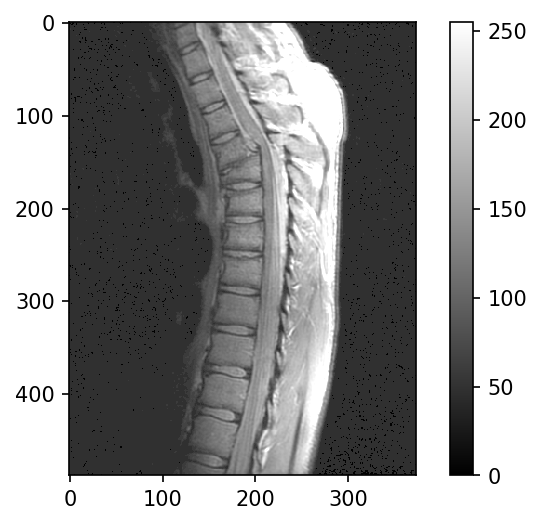

In [10]:
gamma = 0.3
f_gc = np.power(f,gamma)
c = np.max(f)/np.max(f_gc)
f_gc = c * f_gc
gamma = 0.3
plt.figure(dpi=150)
plt.imshow(f_gc,cmap='gray')
plt.colorbar()
plt.show()

### Geometric Transform
- affine transform


In [11]:
from skimage import transform as tf

In [12]:
I = Image.open(path0+'breastXray.tif')
f = np.array(I)
f.shape

(571, 482)

In [14]:
I = np.eye(3)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [15]:
s0 = 0.75
s1 = 1.25
S = np.eye(3)
S[0,0] = s0
S[1,1] = s1
print(S)
print(np.dot(S,np.array([4,2,1])))

[[0.75 0.   0.  ]
 [0.   1.25 0.  ]
 [0.   0.   1.  ]]
[3.  2.5 1. ]


In [16]:
theta = -25 * np.pi/180.0
R = np.eye(3)

R[0,0] = np.cos(theta)
R[0,1] = -np.sin(theta)
R[1,0] = np.sin(theta)
R[1,1] = np.cos(theta)
print(R)
print(np.dot(R,np.array([5,0,1])))

[[ 0.90630779  0.42261826  0.        ]
 [-0.42261826  0.90630779  0.        ]
 [ 0.          0.          1.        ]]
[ 4.53153894 -2.11309131  1.        ]


In [17]:
t0 = 36
t1 = 36
T = np.eye(3)
T[0,2]=t0
T[1,2]=t1
print(T)
print(np.dot(T,np.array([4,2,1])))

[[ 1.  0. 36.]
 [ 0.  1. 36.]
 [ 0.  0.  1.]]
[40. 38.  1.]


[[ 0.67973084  0.3169637  27.        ]
 [-0.52827283  1.13288473 45.        ]
 [ 0.          0.          1.        ]]


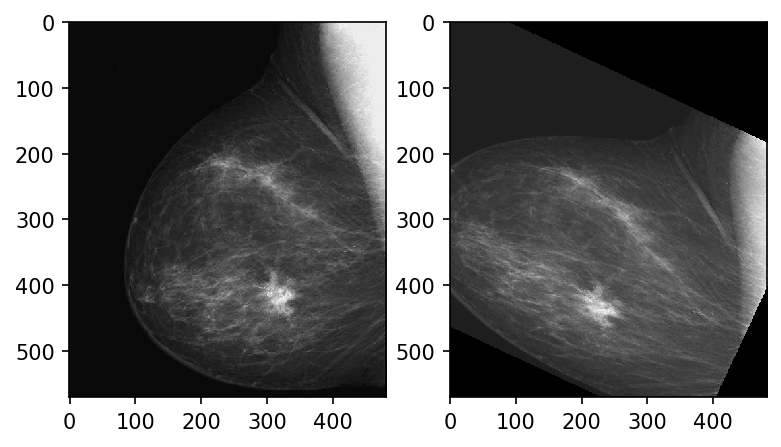

In [18]:
A = np.dot(np.dot(S,T),R)
print(A)
plt.figure(dpi=150)
plt.subplot(121)
plt.imshow(f,cmap='gray')
plt.subplot(122)
plt.imshow(tf.warp(f,A,order=0,mode='constant'),cmap='gray') # mode:{‘constant’, ‘edge’, ‘symmetric’, ‘reflect’, ‘wrap’}
plt.show()

### Histogram Equalization

In [19]:
from PIL import ImageOps

(500, 500)


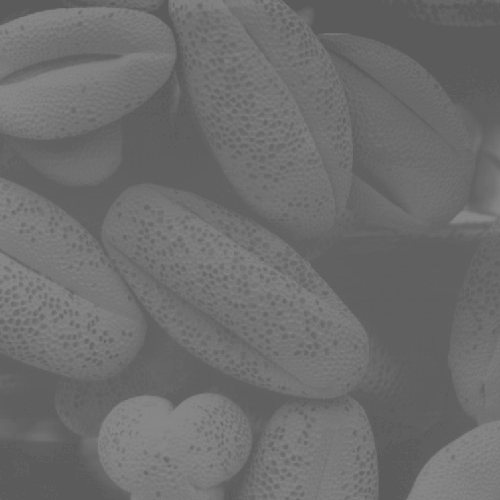

In [20]:
I = Image.open(path0+'pollen-lowcontrast.tif')
print(I.size)
I

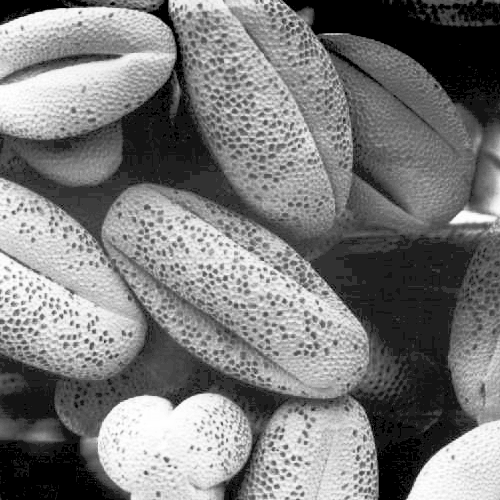

In [21]:
I_eq = ImageOps.equalize(I)
I_eq

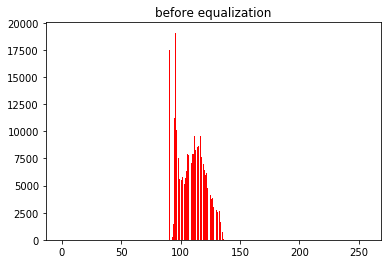

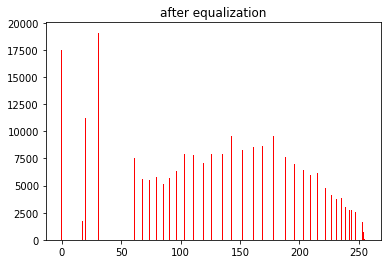

In [22]:
hist = I.histogram()
hist_eq = I_eq.histogram()

for n in range(0,len(hist)):
  plt.bar(n,hist[n],color='r')

plt.title('before equalization')
plt.show()


for n in range(0,len(hist_eq)):
  plt.bar(n,hist_eq[n],color='r')

plt.title('after equalization')
plt.show()

- Histogram Equalization using Mask (Local histogram equalization)

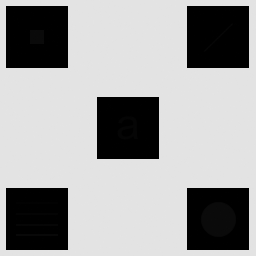

In [23]:
I = Image.open(path0+'hidden-symbols.tif')
I

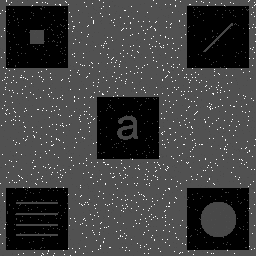

In [24]:
I_eq = ImageOps.equalize(I)
I_eq

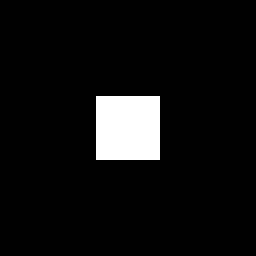

In [25]:
tmp = np.zeros(I.size)
tmp[96:-96,96:-96] =255
#tmp[48:-48,48:-48] =255

mask = Image.fromarray(np.uint8(tmp))
mask

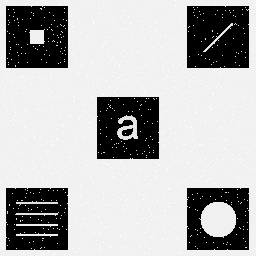

In [26]:
I_eq_mask = ImageOps.equalize(I,mask)
I_eq_mask